# AA_quasar_colors

We illustrate the region occupied by SDSS quasars from Schneider et al. 2007 catalog, as well as SDSS standard stars from Ivezic+2007 catalog. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import os
import pandas as pd 
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import  hstack
from astropy.table import  vstack
from astropy.table import Column
from astropy.table import join
import celerite
import modules as mod
from matplotlib import rcParams 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18

In [3]:
#  SDSS S82 DR9 QSOs
File = '../../CRTS_PROJECT/catalogs_SDSS/DB_QSO_S82.dat'
colnames = ['dbID', 'ra', 'dec', 'SDR5ID', 'M_i', 'M_i_corr', 'redshift',
                   'mass_BH', 'Lbol', 'u', 'g', 'r', 'i', 'z', 'Au']

# 9258 QSO ....
sdssQ = Table.read(File, format='ascii', names = colnames)

In [4]:
# SDSS Standard Stars ...
address = '../../CRTS_PROJECT/catalogs_SDSS/stripe82calibStars_v2.6.dat'
sdssS = Table.read(address, format='ascii', 
             names = ['col1', 'RA','Dec','RArms','Decrms','Ntot','Ar', 
            'uNobs','umed', 'ummu', 'umsig', 'umrms', 'umchi2',
            'gNobs','gmed', 'gmmu', 'gmsig', 'gmrms', 'gmchi2',
            'rNobs','rmed', 'rmmu', 'rmsig', 'rmrms', 'rmchi2',
            'iNobs','imed', 'immu', 'imsig', 'imrms', 'imchi2',
            'zNobs','zmed', 'zmmu', 'zmsig', 'zmrms', 'zmchi2']
            )



Choose randomly a subset of 10000 stars 

In [5]:
indices = np.random.choice(np.arange(len(sdssS)), size=10000, replace=False)
sdssSsel = sdssS[indices]
for f in 'ugriz':
    sdssSsel.rename_column(f+'med', f)

## Iteration 1

Plot filter sequence :  
 * u-g vs g-r,  
 * g-r vs r-i,  
 * r-i vs i-z  ... 

x =  u - g
y =  g - r
x =  g - r
y =  r - i
x =  r - i
y =  i - z
x =  u - g
y =  g - r
x =  g - r
y =  r - i
x =  r - i
y =  i - z


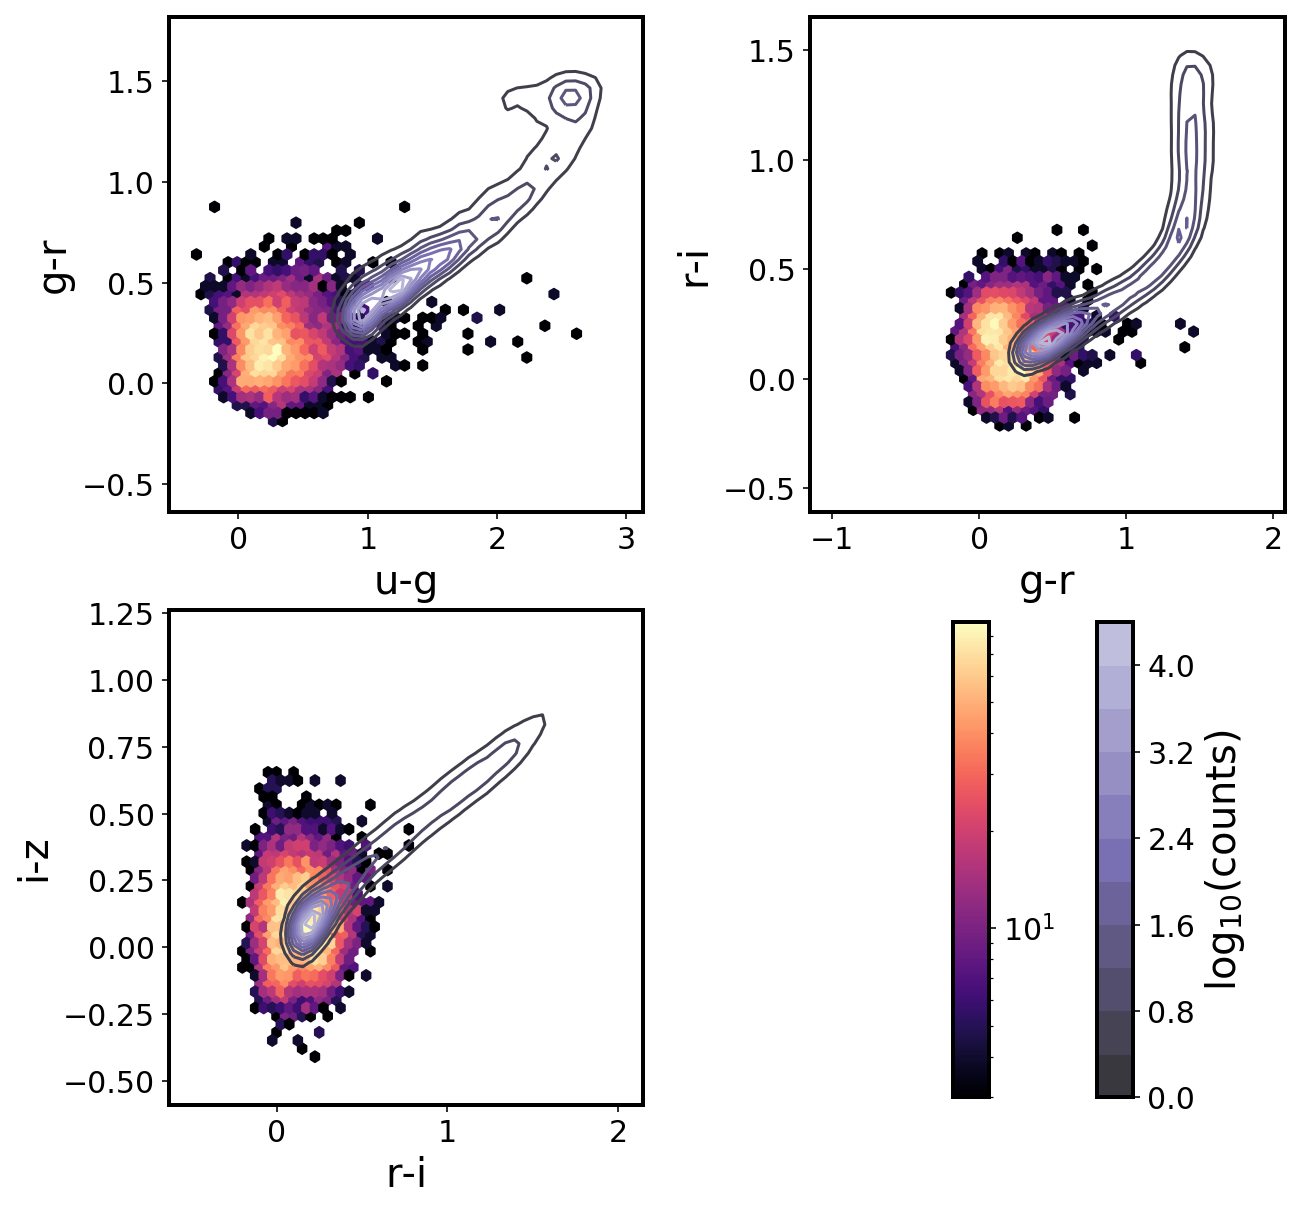

In [9]:
# Plot quasars and stars on color-color diagrams ...
%matplotlib inline

xlabels = ['u-g', 'g-r', 'r-i', '' ]
ylabels = ['g-r', 'r-i', 'i-z', '' ]
extent = [[-0.5,3, -0.5, 1.7 ],
           [-1,2, -0.5, 1.5],
           [-0.5,2, -0.5, 1.2]]
fig,axs = plt.subplots(2,2, figsize=(10,10))
ax = np.ravel(axs)

plot =  {'stars':[sdssSsel, 'viridis', 'black'], 'qso':[sdssQ, 'magma', 'red'] }

import seaborn as sns 

for obj in plot.keys():
    cat = plot[obj][0]
    color = plot[obj][1]
    fseq = 'ugriz' # filter sequence 
    for i in range(len(fseq)-2):
        print('x = ',fseq[i],'-', fseq[i+1] )
        print('y = ',fseq[i+1],'-', fseq[i+2] )
        x  = cat[fseq[i]] - cat[fseq[i+1]]
        y =  cat[fseq[i+1]] - cat[fseq[i+2]]
        if obj is 'qso': 
            image = ax[i].hexbin(x,y, mincnt=3, extent = extent[i], 
                    gridsize=50, bins='log',
                    cmap  = color)
        if obj is 'stars' : 
            mx = (extent[i][0] < x ) * (x < extent[i][1])
            my = (extent[i][2] < y ) * (y < extent[i][3] )
            m = mx * my 
            image1 = sns.kdeplot(x[m],y[m], cmap="Purples_d", gridsize=50, 
                        shade=False, bw=.05 , legend=False, ax=ax[i]) 

# add axis labels ... 
for j in range(len(ax)):
    ax[j].set_xlabel(xlabels[j])
    ax[j].set_ylabel(ylabels[j])

fig.subplots_adjust(wspace=0.35)

# add colorbars  
left, bottom, width, height = 0.67,0.13, 0.025,0.33

# cbar for qso 
cax = fig.add_axes([left,bottom,width,height])
plt.colorbar(mappable = image, cax = cax)

# cbar for stars 
cax = fig.add_axes([left+0.1,bottom,width,height])

# make a dummy plot only to have a cbar for seaborn ... 
i = 0
x  = sdssQ['u']-sdssQ['g']
y =  sdssQ['g']-sdssQ['r']
mx = (extent[i][0] < x ) * (x < extent[i][1])
my = (extent[i][2] < y ) * (y < extent[i][3] )
m = mx * my 
sns.kdeplot(x[m],y[m], cmap="Purples_d", gridsize=50, 
             shade=True, bw=.05 , cbar=True, legend=False, ax=ax[-1] , 
            cbar_ax = cax, 
            cbar_kws = {'label':r'$\log_{10}{(\mathrm{counts})}$'}) 
#ax[-1].axis('off')
ax[-1].set_visible(False) # make it invisible  
plt.savefig('SDSS_S82_CMD_qso_stars.png', bbox_inches='tight')

Color - color diagrams for 6444 SDSS S82 quasars with PTF, PS1 and CRTS photometry. The convention is to always define a 'color' by subtracting the redder filter from the bluer filter. That way any color has negative values for intrinsically bluer objects - emitting more in the blue part of the spectrum (eg. QSO, RR Lyr), and positive values for redder objects (eg. M stars). Thus using the SDSS base of 'u g r i z' colors,  we form u-g, g-r,  r-i, i-z  colors, as well as g-i, which skips the r filter. Another convention is to plot the bluer color on x-axis (eg. u-g) vs redder color (eg. g-r) on y axis (see \citealt{ivezic2002,sesar2007}). Thus from the upper-left panel to bottom-right panel we cycle through color pairs showing that quasars occupy a distinct locus in each color combination. To calculate photometric offsets between SDSS and PS1, PTF, CRTS, we employ standard stars with colors based on the region occupied by quasars in the u-g vs g-i color space. 

## Iteration 2 

Modify the code to plot g-i vs r-i  rather than r-i vs i-z,  since this would better illustrate  that g-i  gives a better wavelength separation than g-r. Both g-r and g-i are better choices than u-g because in u-g there is not much overlap in color between stars and quasars, so we would not be able to apply the color transformations as well . 

x =  u - g
y =  g - r
x =  g - r
y =  r - i
x =  g - i
y =  r - i
x =  u - g
y =  g - r
x =  g - r
y =  r - i
x =  g - i
y =  r - i


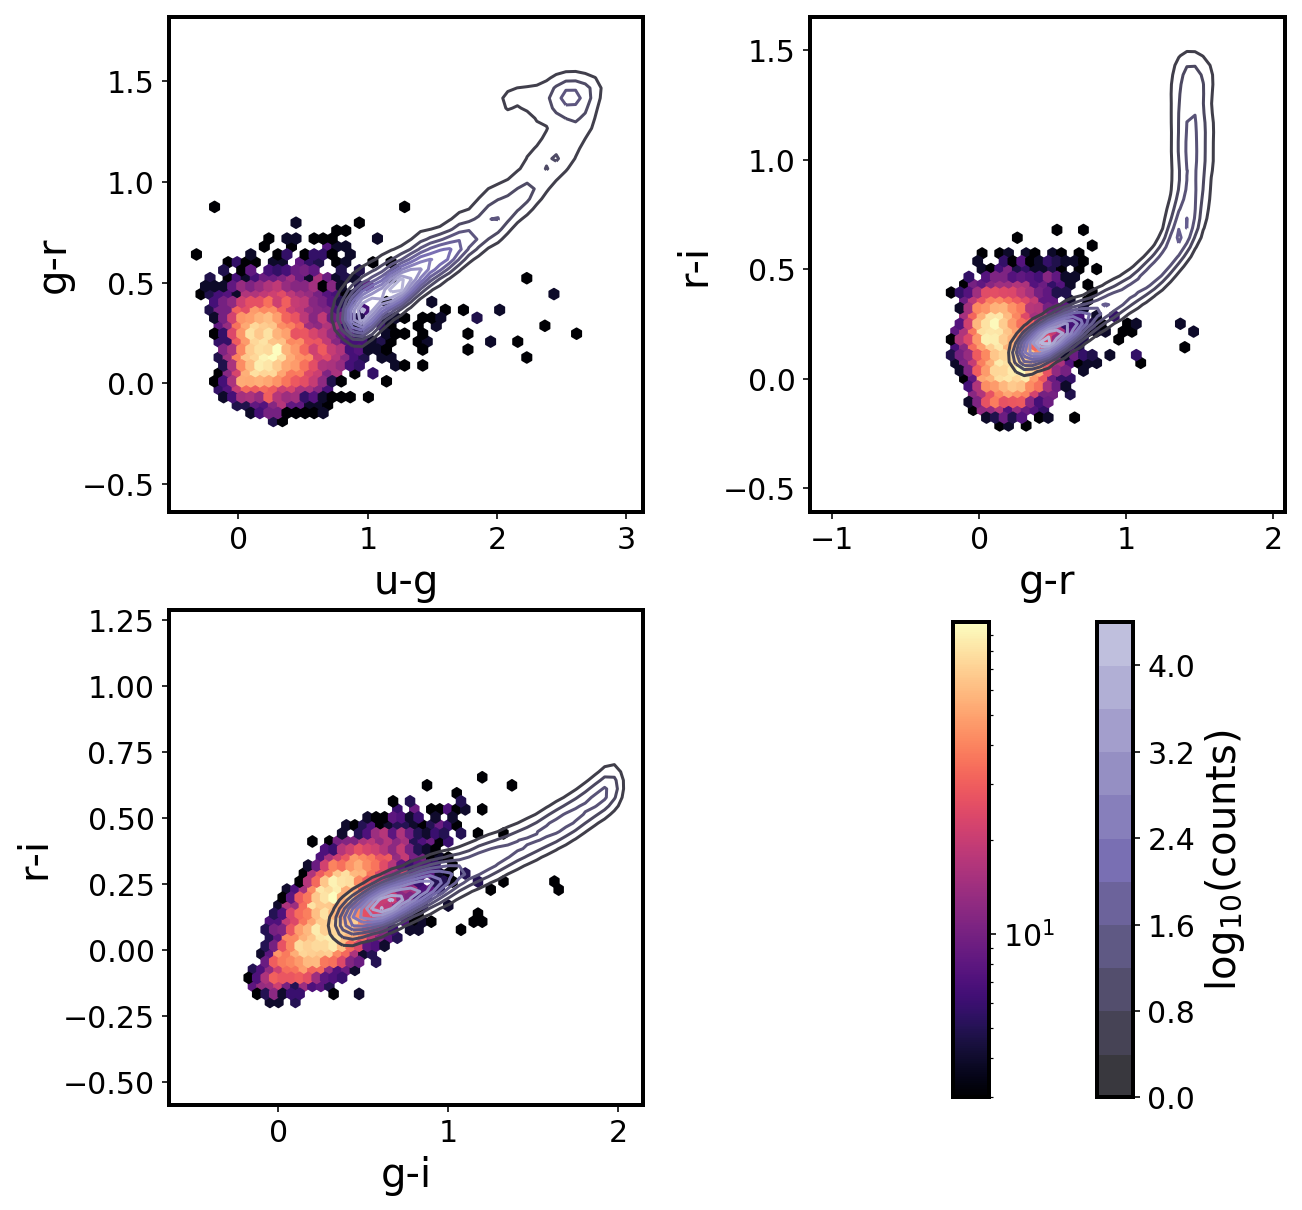

In [8]:
# Plot quasars and stars on color-color diagrams ...
%matplotlib inline

xlabels = ['u-g', 'g-r', 'g-i' ]
ylabels = ['g-r', 'r-i', 'r-i' ]
extent = [[-0.5,3, -0.5, 1.7 ],
           [-1,2, -0.5, 1.5],
           [-0.5,2, -0.5, 1.2]]
fig,axs = plt.subplots(2,2, figsize=(10,10))
ax = np.ravel(axs)

plot =  {'stars':[sdssSsel, 'viridis', 'black'], 'qso':[sdssQ, 'magma', 'red'] }

import seaborn as sns 

for obj in plot.keys():
    cat = plot[obj][0]
    color = plot[obj][1]
    fseq = 'ugriz' # filter sequence 
    for i in range(len(xlabels)):
        x1,x2 = xlabels[i][0], xlabels[i][2]
        y1,y2 = ylabels[i][0], ylabels[i][2]
        print('x = ',x1,'-', x2)
        print('y = ',y1,'-', y2)
        
        x  = cat[x1] - cat[x2]
        y =  cat[y1] - cat[y2]
        
        if obj is 'qso': 
            image = ax[i].hexbin(x,y, mincnt=3, extent = extent[i], 
                    gridsize=50, bins='log',
                    cmap  = color)
        if obj is 'stars' : 
            mx = (extent[i][0] < x ) * (x < extent[i][1])
            my = (extent[i][2] < y ) * (y < extent[i][3] )
            m = mx * my 
            image1 = sns.kdeplot(x[m],y[m], cmap="Purples_d", gridsize=50, 
                        shade=False, bw=.05 , legend=False, ax=ax[i]) 

# add axis labels ... 
for j in range(len(xlabels)):
    ax[j].set_xlabel(xlabels[j])
    ax[j].set_ylabel(ylabels[j])

fig.subplots_adjust(wspace=0.35)

# add colorbars  
left, bottom, width, height = 0.67,0.13, 0.025,0.33

# cbar for qso 
cax = fig.add_axes([left,bottom,width,height])
plt.colorbar(mappable = image, cax = cax)

# cbar for stars 
cax = fig.add_axes([left+0.1,bottom,width,height])

# make a dummy plot only to have a cbar for seaborn ... 
i = 0
x  = sdssQ['u']-sdssQ['g']
y =  sdssQ['g']-sdssQ['r']
mx = (extent[i][0] < x ) * (x < extent[i][1])
my = (extent[i][2] < y ) * (y < extent[i][3] )
m = mx * my 
sns.kdeplot(x[m],y[m], cmap="Purples_d", gridsize=50, 
             shade=True, bw=.05 , cbar=True, legend=False, ax=ax[-1] , 
            cbar_ax = cax, 
            cbar_kws = {'label':r'$\log_{10}{(\mathrm{counts})}$'}) 
ax[-1].set_visible(False) # make it invisible  
plt.savefig('SDSS_S82_CMD_qso_stars_new.png', bbox_inches='tight')

## Iteration 3

Remove the color from contours of stellar locus,  move the legend out, add g vs u-g diagram 

x =  u - g
y =  g - r
x =  g - r
y =  r - i
x =  g - i
y =  r - i
x =  u - g
y =  g - r
x =  g - r
y =  r - i
x =  g - i
y =  r - i
x = u-g
y = g


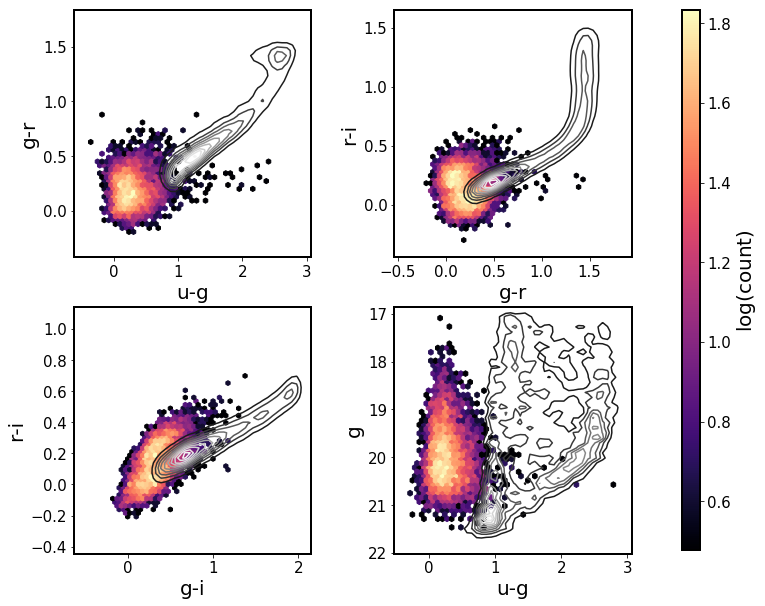

In [6]:
# Plot quasars and stars on color-color diagrams ...
%matplotlib inline

xlabels = ['u-g', 'g-r', 'g-i']
ylabels = ['g-r', 'r-i', 'r-i']
extent = [[-0.5,3, -0.3, 1.7 ], # xmin,xmax, ymin, ymax    
           [-0.5,1.8, -0.3, 1.5],
           [-0.5,2, -0.3, 1.],
         ]
fig,axs = plt.subplots(2,2, figsize=(10,10))
ax = np.ravel(axs)

plot =  {'stars':sdssSsel, 'qso': sdssQ }

import seaborn as sns 

# plot the axes 0:2
for obj in plot.keys():
    cat = plot[obj]
    fseq = 'ugriz' # filter sequence 
    for i in range(len(xlabels)):
        x1,x2 = xlabels[i][0], xlabels[i][2]
        y1,y2 = ylabels[i][0], ylabels[i][2]
        print('x = ',x1,'-', x2)
        print('y = ',y1,'-', y2)
        
        x  = cat[x1] - cat[x2]
        y =  cat[y1] - cat[y2]
        
        if obj is 'qso': 
            image = ax[i].hexbin(x,y, mincnt=3, extent = extent[i], 
                    gridsize=50, bins='log',
                    cmap  = 'magma')
        if obj is 'stars' : 
            mx = (extent[i][0] < x ) * (x < extent[i][1])
            my = (extent[i][2] < y ) * (y < extent[i][3] )
            m = mx * my 
            image1 = sns.kdeplot(x[m],y[m], cmap='Greys_r', gridsize=50, 
                        shade=False, bw=.05 , legend=False, ax=ax[i]) 

# plot the third ( bottom right ) axis 
extent = [-0.5,3,17,22.]
print('x = u-g')
print('y = g')
for obj in plot.keys():
    cat = plot[obj]
    x  = cat['u'] - cat['g'] # u-g 
    y =  cat['g']
    if obj is 'qso': 
        image = ax[3].hexbin(x,y, mincnt=3, extent = extent, 
                gridsize=50, bins='log', cmap  = 'magma')
    if obj is 'stars' : 
        mx = (extent[0] < x ) * (x < extent[1])
        my = (extent[2] < y ) * (y < extent[3] )
        m = mx * my 
        image1 = sns.kdeplot(x[m],y[m], cmap='Greys_r', gridsize=50, 
                    shade=False, bw=.05 , legend=False, ax=ax[3]) 

ax[3].invert_yaxis()
ax[3].set_xlabel('u-g')
ax[3].set_ylabel('g')

# add axis labels ... 
for j in range(len(xlabels)):
    ax[j].set_xlabel(xlabels[j])
    ax[j].set_ylabel(ylabels[j])

fig.subplots_adjust(wspace=0.35)

# add colorbars  
left, bottom, width, height = 0.97,0.13, 0.025,0.75

# cbar for qso 
cax = fig.add_axes([left,bottom,width,height])

import matplotlib as mpl
vmin, vmax = image.get_clim()
norm = mpl.colors.Normalize(vmin=np.log10(vmin), vmax=np.log10(vmax))
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=image.get_cmap())
cmap.set_array([])

plt.colorbar(mappable = cmap, cax = cax, orientation='vertical',
            label=r'$\log{(\mathrm{count})}$')


# cbar f
#ax[-1].set_visible(False) # make it invisible  
plt.savefig('SDSS_S82_CMD_qso_stars_2.png', bbox_inches='tight', dpi=100)

Plot quasars on u-g vs g-r  , color by redshift .... 

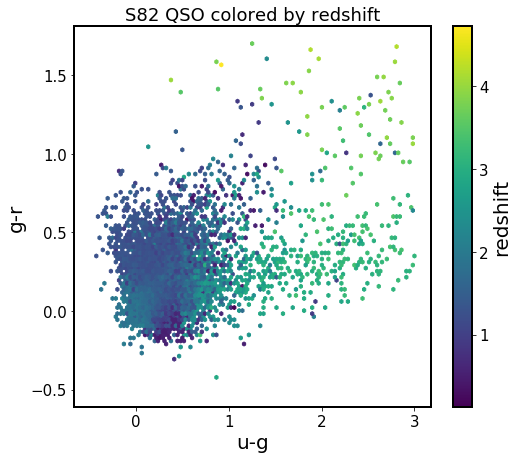

In [17]:
%matplotlib inline
fig,ax = plt.subplots(1,1,figsize=(8,7))
x = sdssQ['u'] - sdssQ['g']
y = sdssQ['g'] - sdssQ['r']
z = sdssQ['redshift']
image = ax.hexbin(x, y, z, extent = [-0.5,3, -0.5, 1.7 ])
ax.set_xlabel('u-g')
ax.set_ylabel('g-r')
# add colorbars  
left, bottom, width, height = 0.67,0.13, 0.025,0.33

# cbar for qso 
#cax = fig.add_axes([left,bottom,width,height])
plt.colorbar(mappable = image,ax=ax, label='redshift')
ax.set_title('S82 QSO colored by redshift')